In [3]:
%matplotlib ipympl
import pickle

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from simulate_dicke import sim_dicke


In [4]:
def plot_sim_dicke(
    N: int, T: float, n: int = 0, freq: float = 1.0, coup: float = 1.0
):
    tt, vt, et = sim_dicke(N, T, n, freq, coup)
    plt.scatter(tt, np.real_if_close(et[0]), s=10)
    plt.xlabel("t")
    plt.ylabel("$\\langle v(t), \\hat n v(t)\\rangle$")
    plt.title(f"N={N}")
    plt.show()

In [ ]:
with open("dicke_sim_09_01_2025-16_19_05_N-2-20_T-6.0.pickle", "rb") as file:
    data = pickle.load(file)

In [6]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        "trunc({n},{a:.2f},{b:.2f})".format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)),
    )
    return new_cmap

/tmp/ipykernel_447372/1109154694.py:5: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  fig, ax = plt.subplots(layout="constrained", num=1)


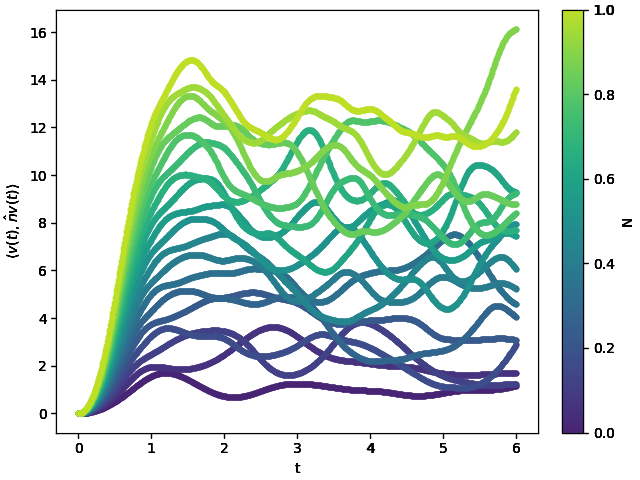

In [11]:
ys = [np.real_if_close(res["et"][0]) for res in data]
xs = [res["tt"] for res in data]
Ns = [res["N"] for res in data]

fig, ax = plt.subplots(layout="constrained", num=1)

cmap = truncate_colormap(mpl.cm.viridis, 0.1, 0.9, len(ys))
colors = cmap(np.linspace(0, 1, len(ys)))

for N, x, y, c in zip(Ns, xs, ys, colors):
    ax.scatter(x, y, s=10, label=f"N={N}", color=c)


ax.set_xlabel("t")
ax.set_ylabel("$\\langle v(t), \\hat n v(t)\\rangle$")
fig.colorbar(
    mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 1), cmap=cmap),
    label="N",
    ax=ax,
    orientation="vertical",
    # ticks=Ns,
)
fig.show()